<a href="https://colab.research.google.com/github/AveryHsieh/Machine-Learning/blob/main/HeartAttackAnalysis%26Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 練習 :
實作 3 種不同模型，練習１種參數調整方法(EX: GridSearch、RandomizedSearch...)，找出3種模型的最佳參數組合，比較最終結果。

##載入函式庫（libraries）

In [ ]:
from sklearn.metrics import make_scorer, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
import pandas as pd

## 導入data set


資料集來源 : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data

連接Google Drive，並使用read_csv()函數導入CSV格式的數據集

In [ ]:
#連接Google雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/112-1/機器學習觀念與應用/練習三/heart.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 查看資料集

In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# 確認有無NA值
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<Axes: title={'center': 'Output value counts'}>

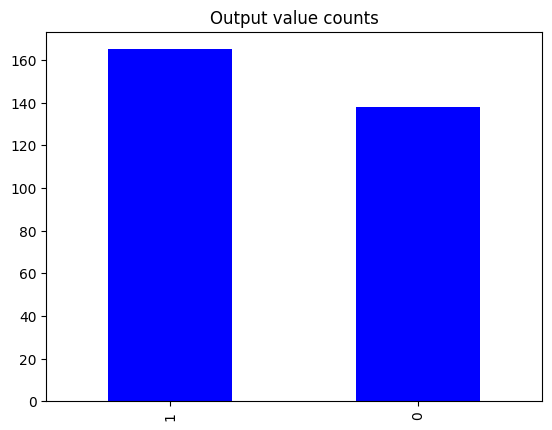

In [ ]:
# 正負類別分布
value_counts = data['output'].value_counts()

value_counts.plot.bar(title = 'Output value counts',color='b')

# 模型實作與比較



In [ ]:
# 分割特徵和目標變數
X = data.drop('output', axis=1)
y = data['output']

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




> 支援向量機 (Support Vector Machine)   
參數調整方法 : RandomizedSearch



In [ ]:
# 支援向量機 (Support Vector Machine) 的參數範圍
svm_param_dist = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear']
}

# 使用RandomizedSearchCV來尋找最佳參數組合
svm_random_search = RandomizedSearchCV(SVC(probability=True), param_distributions=svm_param_dist, n_iter=10, cv=5)
svm_random_search.fit(X_train, y_train)
svm_best_model = svm_random_search.best_estimator_



> 決策樹 (Decision Trees)  
參數調整方法 : RandomizedSearch



In [ ]:
# 決策樹 (Decision Trees) 的參數範圍
dt_param_dist = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 使用RandomizedSearchCV來尋找最佳參數組合
dt_random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=dt_param_dist, n_iter=10, cv=5)
dt_random_search.fit(X_train, y_train)
dt_best_model = dt_random_search.best_estimator_



> XGBoost   
參數調整方法 : RandomizedSearch



In [ ]:
# XGBoost模型的參數範圍
xgb_param_dist = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# 使用RandomizedSearchCV來尋找最佳參數組合
xgb_random_search = RandomizedSearchCV(XGBClassifier(), param_distributions=xgb_param_dist, n_iter=10, cv=5)
xgb_random_search.fit(X_train, y_train)
xgb_best_model = xgb_random_search.best_estimator_

#模型評估

##分類報告(classification report)

使用RandomizedSearchCV來尋找SVM、決策樹和XGBoost模型的最佳參數組合，並印出每個模型在訓練集上的classification report。這些報告將提供模型的精確度、召回率、F1分數等指標，供三種模型性能的比較。

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# 在訓練集上做預測
svm_train_pred = svm_best_model.predict(X_train)
dt_train_pred = dt_best_model.predict(X_train)
xgb_train_pred = xgb_best_model.predict(X_train)

# 印出三種模型在訓練集上的分類報告
print("SVM Classification Report:")
print(classification_report(y_true=y_train, y_pred=svm_train_pred))

print("Decision Tree Classification Report:")
print(classification_report(y_true=y_train, y_pred=dt_train_pred))

print("XGBoost Classification Report:")
print(classification_report(y_true=y_train, y_pred=xgb_train_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       109
           1       0.86      0.89      0.87       133

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       109
           1       0.91      0.91      0.91       133

    accuracy                           0.90       242
   macro avg       0.90      0.90      0.90       242
weighted avg       0.90      0.90      0.90       242

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       133

    accuracy                           1.00       242
   macro avg       1.00      1.00

**SVM 模型結果:**

* 精確度 (Precision):
 * 類別 0: 0.86，表示當模型預測為 0 的時候，實際上有 86% 的機會是正確的。

 * 類別 1: 0.86，表示當模型預測為 1 的時候，實際上有 86% 的機會是正確的。

* 召回率 (Recall):

 * 類別 0: 0.83，表示在實際為 0 的樣本中，模型成功預測的比例為 83%。

 * 類別 1: 0.89，表示在實際為 1 的樣本中，模型成功預測的比例為 89%。

* F1 分數 (F1-Score):

 * 類別 0: 0.84，是精確度和召回率的調和平均值。它是一個綜合考慮精確度和召回率的指標。

 * 類別 1: 0.87，是精確度和召回率的調和平均值。它是一個綜合考慮精確度和召回率的指標。

* 準確度 (Accuracy): 0.86，表示模型正確預測的樣本比例為 86%。
---

**決策樹模型結果:**

* 精確度 (Precision):

 * 類別 0: 0.89，表示當模型預測為 0 的時候，實際上有 89% 的機會是正確的。

 * 類別 1: 0.91，表示當模型預測為 1 的時候，實際上有 91% 的機會是正確的。

* 召回率 (Recall):

 * 類別 0: 0.89，表示在實際為 0 的樣本中，模型成功預測的比例為 89%。

 * 類別 1: 0.91，表示在實際為 1 的樣本中，模型成功預測的比例為 91%。

* F1 分數 (F1-Score):

 * 類別 0: 0.89，是精確度和召回率的調和平均值。

 * 類別 1: 0.91，是精確度和召回率的調和平均值。

* 準確度 (Accuracy): 0.90，表示模型正確預測的樣本比例為 90%。
---

**XGBoost 模型結果:**

* 精確度 (Precision):

  * 類別 0: 1.00，表示當模型預測為 0 的時候，所有的預測都是正確的。

  * 類別 1: 1.00，表示當模型預測為 1 的時候，所有的預測都是正確的。

* 召回率 (Recall):

  * 類別 0: 1.00，表示在實際為 0 的樣本中，模型成功預測的比例為 100%。

  * 類別 1: 1.00，表示在實際為 1 的樣本中，模型成功預測的比例為 100%。

* F1 分數 (F1-Score):

  * 類別 0: 1.00，是精確度和召回率的調和平均值。

  * 類別 1: 1.00，是精確度和召回率的調和平均值。

* 準確度 (Accuracy): 1.00，表示模型正確預測的樣本比例為 100%。
---

**比較:**

1. XGBoost 模型在訓練集上取得了完美的準確度，所有的預測都是正確的。這表示在訓練集上，XGBoost 模型的性能優於SVM和決策樹模型。

2. 決策樹模型的表現也相當不錯，其準確度為90%，並且在精確度、召回率和F1分數上都達到了相當高的值。

3. SVM 模型雖然精確度為86%，但在召回率和F1分數上略遜於決策樹模型。

In [ ]:
# 在測試集上做預測
svm_test_pred = svm_best_model.predict(X_test)
dt_test_pred = dt_best_model.predict(X_test)
xgb_test_pred = xgb_best_model.predict(X_test)

# 印出三種模型在測試集上的分類報告
print("SVM Classification Report:")
print(classification_report(y_true=y_test, y_pred=svm_test_pred))

print("Decision Tree Classification Report:")
print(classification_report(y_true=y_test, y_pred=dt_test_pred))

print("XGBoost Classification Report:")
print(classification_report(y_true=y_test, y_pred=xgb_test_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        29
           1       0.96      0.75      0.84        32

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.82      0.72      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77

**SVM 模型結果:**

* 精確度 (Precision):

 * 類別 0: 0.84，表示當模型預測為 0 的時候，實際上有 84% 的機會是正確的。

 * 類別 1: 0.90，表示當模型預測為 1 的時候，實際上有 90% 的機會是正確的。

* 召回率 (Recall):

 * 類別 0: 0.90，表示在實際為 0 的樣本中，模型成功預測的比例為 90%。

 * 類別 1: 0.84，表示在實際為 1 的樣本中，模型成功預測的比例為 84%。

F* 1 分數 (F1-Score):

 * 類別 0: 0.87，是精確度和召回率的調和平均值。

 * 類別 1: 0.87，是精確度和召回率的調和平均值。

* 準確度 (Accuracy): 0.87，表示模型正確預測的樣本比例為 87%。
___

**決策樹模型結果:**

* 精確度 (Precision):

 * 類別 0: 0.78，表示當模型預測為 0 的時候，實際上有 78% 的機會是正確的。

 * 類別 1: 0.96，表示當模型預測為 1 的時候，實際上有 96% 的機會是正確的。

* 召回率 (Recall):

 * 類別 0: 0.97，表示在實際為 0 的樣本中，模型成功預測的比例為 97%。

 * 類別 1: 0.75，表示在實際為 1 的樣本中，模型成功預測的比例為 75%。

* F1 分數 (F1-Score):

 * 類別 0: 0.86，是精確度和召回率的調和平均值。

 * 類別 1: 0.84，是精確度和召回率的調和平均值。

* 準確度 (Accuracy): 0.85，表示模型正確預測的樣本比例為 85%。
___

**XGBoost 模型結果:**

* 精確度 (Precision):

 * 類別 0: 0.73，表示當模型預測為 0 的時候，實際上有 73% 的機會是正確的。

 * 類別 1: 0.82，表示當模型預測為 1 的時候，實際上有 82% 的機會是正確的。

* 召回率 (Recall):

 * 類別 0: 0.83，表示在實際為 0 的樣本中，模型成功預測的比例為 83%。

 * 類別 1: 0.72，表示在實際為 1 的樣本中，模型成功預測的比例為 72%。

* F1 分數 (F1-Score):

 * 類別 0: 0.77，是精確度和召回率的調和平均值。

 * 類別 1: 0.77，是精確度和召回率的調和平均值。

* 準確度 (Accuracy): 0.77，表示模型正確預測的樣本比例為 77%。
___
**比較:**

1. 在測試集上，SVM 模型的精確度和召回率都相對較高，F1 分數也相當不錯，準確度為
87%。這意味著 SVM 模型在測試數據上的性能相對不錯，能夠相對準確地預測心臟病患者和
非患者。

2. 決策樹模型在測試集上的召回率相對較高，但精確度稍低，F1 分數為 0.85，準確度為
85%。這意味著決策樹模型在區分實際心臟病患者方面相對不錯。

3. XGBoost 模型在這個測試集上的性能相對較差，需要進一步的調優或者考慮其他模型。

4. XGBoost在訓練集是三個模型中分類表現最好的，但到了測試及卻是表現最差的，可能發生了過度擬合（Overfitting）的狀況
